In [1]:
#Preprocesamiento
import pandas as pd
import numpy as np
df = pd.read_csv("titanic_train.csv")
cabecera = ["id","sobreviviente","clase","nombre","sexo","edad","hermanos","hijos","ticket","tarifa","cabina","embarque"]
df.columns = cabecera

# Exploración de Datos

In [3]:
df.head(3)

,id,sobreviviente,clase,nombre,sexo,edad,hermanos,hijos,ticket,tarifa,cabina,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Verificar Tipos de Datos
* En Machine Learning se acostumbra a usar Datos Numéricos

In [5]:
df.dtypes

id                 int64
sobreviviente      int64
clase              int64
nombre            object
sexo              object
edad             float64
hermanos           int64
hijos              int64
ticket            object
tarifa           float64
cabina            object
embarque          object
dtype: object

Análisis Estadísticos en el DataFrame

In [6]:
#Se omiten datos que no sean numericos
df.describe()

,id,sobreviviente,clase,edad,hermanos,hijos,tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Describe para datos categórico
df.describe(include=["O"])

,nombre,sexo,ticket,cabina,embarque
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Obtener información Relevante en el Dataframe

In [12]:
#Se obtiene la dimensión del arreglo, los tipos de variables
#Se obtiene el conocimiento de si existen o no valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             891 non-null    int64  
 1   sobreviviente  891 non-null    int64  
 2   clase          891 non-null    int64  
 3   nombre         891 non-null    object 
 4   sexo           891 non-null    object 
 5   edad           714 non-null    float64
 6   hermanos       891 non-null    int64  
 7   hijos          891 non-null    int64  
 8   ticket         891 non-null    object 
 9   tarifa         891 non-null    float64
 10  cabina         204 non-null    object 
 11  embarque       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


¿Qué debemos Hacer con Datos Faltantes?

* Opciones
    * Verificar si la fuente nos puede brindar los datos que faltan
    * Eliminar los datos donse se encuentra el valor perdido (<)
    * Reemplazar el valor, ya sea por el promedio si es numérico o por el que tenga mayor frencuencia de ser categórico. 
    * Mantener los Datos Faltantes, así simplemente. 


Eliminar Datos Faltantes

In [13]:
#Eliminar todas las filas donde existen datos perdidos
df.dropna(axis=0)

,id,sobreviviente,clase,nombre,sexo,edad,hermanos,hijos,ticket,tarifa,cabina,embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
#Eliminar todas las filas donde existen valores faltantes en una columna
df.dropna(subset=["cabina"],axis=0)

,id,sobreviviente,clase,nombre,sexo,edad,hermanos,hijos,ticket,tarifa,cabina,embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
#Eliminar todas las Columnas que obtengas datos Faltantes
df.dropna(axis=1)

,id,sobreviviente,clase,nombre,sexo,hermanos,hijos,ticket,tarifa
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


* Atención este método no es en muchos casos el ideal, pero en caso de emplearlo debes percatarte con que los datos faltantes solo sean pocos.

Reemplazar Datos Faltantes

In [17]:
#Reemplazaremos los valores faltantes con el promedio de la edad de los pasajeros
print("El promedio de la edad es:",df["edad"].mean())

El promedio de la edad es: 29.69911764705882


In [23]:
#Redondeamos el promedio_edad para que no cuente con decimales
promedio_edad = round(df["edad"].mean(),0) #0 → No decimales
promedio_edad

30.0

In [29]:
#De esta forma reemplazaremos los datos faltantes, por el parametro
df["edad"].fillna(promedio_edad)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: edad, Length: 891, dtype: float64

Cambiar Variables Categóricas a Numéricas

In [31]:
#Se deben cambiar todos los datos. 
df["sexo"] = df["sexo"].map({"male":0,"female":1}).astype(int)
df["sexo"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sexo, Length: 891, dtype: int32

Forma Alternativa

In [33]:
#Sirve para datos binarios - Sí o No
numero = 0
if(numero>0):
    df = pd.get_dummies(df,columns=["Sexo"],drop_first=True)

# Agrupando Datos

In [35]:
df.head(3)

,id,sobreviviente,clase,nombre,sexo,edad,hermanos,hijos,ticket,tarifa,cabina,embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [37]:
group_sex = df.groupby(["sobreviviente","sexo"]).size()
group_sex.unstack(level=0)

sobreviviente,0,1
sexo,,
0,468,109
1,81,233


<AxesSubplot:xlabel='sexo'>

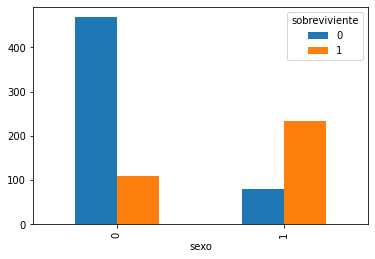

In [39]:
group_sex.unstack(level=0).plot.bar()

# Agrupar Datos en Intervalos

* En edades es recomendable trabajar con rangos, dado a que estos pueden compartir características similares en edades cercanas.
* Es posible aplicar la regla de sturges?

In [41]:
rangos = [0,5,12,18,35,60,100]
names = ["1","2","3","4","5","6"]

df["edad"] = pd.cut(df["edad"],rangos,labels=names)

In [43]:
df.head(3)

,id,sobreviviente,clase,nombre,sexo,edad,hermanos,hijos,ticket,tarifa,cabina,embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,7.9250,NaN,S


* Ahora es posible agruparlos por edades!! por rango de edades.

<AxesSubplot:xlabel='edad'>

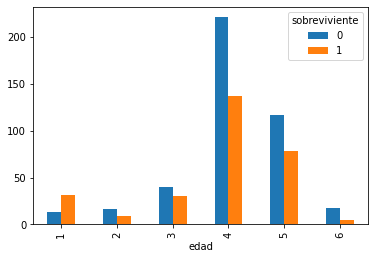

In [48]:
group_rango_edad = df.groupby(["sobreviviente","edad"]).size()
group_rango_edad.unstack(level=0).plot.bar()

In [49]:
df.shape

(891, 12)

In [50]:
df["edad"].max()

'6'

Lo importante de esto es no dejarse llevar por la AMBIGUEDAD, tiene que existir una clara tendencia.

* De 0 a 5 años la tasa de supervivencia es más alta. 
* De 5 a 12 años la mortandas es mas alta a la supervivencia.
* Similar sucede de 12 a 18
* Pero es entre 18 y 35 & 35 y 60, donde se pronuncia una tendencia clara a no sobrevivir.
* El caso de los adultos mayores o ancianos se vuelve nada prometedor. 